# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [1]:
# your answer here
import pandas as pd

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [26]:
# your answer here
data=pd.read_csv("Employee.csv")
data.head()
data.shape
data

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [7]:
# Method 1
# your answer here
mean_salary = data.groupby('Department')['Salary'].mean()

print(mean_salary)


Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64


In [9]:
# Method 2
# your answer here
pivot_table = pd.pivot_table(data, values='Salary', index=['Department'], aggfunc='mean')
pivot_table

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [12]:
# your answer here
pivot_table = pd.pivot_table(data, values='Salary', index=['Department', 'Title'], aggfunc='mean')

pivot_table


Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [16]:
# your answer here
pivot_table = pd.pivot_table(data, values=['Salary', 'Years'], index=['Title'], aggfunc=['mean', 'count'])
pivot_table

mean        count      
              Salary Years Salary Years
Title                                  
VP         70.000000  8.00      2     2
analyst    32.500000  2.25      4     4
associate  56.666667  4.00      3     3

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [19]:
# your answer here
pivot_table = pd.pivot_table(data, values=['Salary'], index=['Department', 'Title'], aggfunc=['mean', 'count'])
pivot_table

mean  count
                     Salary Salary
Department Title                  
HR         VP          70.0      1
           analyst     32.5      2
IT         VP          70.0      1
           analyst     32.5      2
           associate   60.0      1
Sales      associate   55.0      2

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [22]:
# your answer here
pivot_table = pd.pivot_table(data, values='Salary', index=['Department', 'Title'], aggfunc=['median', 'min', 'max', 'std'])
pivot_table


median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [24]:
# your answer here
pivot_table = pivot_table.fillna(0)
pivot_table

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [ ]:
# your answer here


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [29]:
# your answer here
pivot_table = pd.pivot_table(data, values=['Name', 'Salary'], index='Department', aggfunc={'Name': 'count', 'Salary': 'sum'})
pivot_table

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [34]:
# your answer here



# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [37]:
# your answer here
fitbit=pd.read_csv("Fitbit.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [38]:
# your answer here
print(fitbit.dtypes)

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object


In [39]:
# your answer here
print(fitbit.describe())


       Calorie burned         Steps    Distance      Floors  \
count      367.000000    367.000000  367.000000  367.000000   
mean      2741.501362  10121.588556    8.549128   11.724796   
std        916.307036   5594.836225    3.409881   10.337370   
min        179.000000      0.000000    0.000000    0.000000   
25%       2698.000000   6730.500000    6.155000    5.000000   
50%       2974.000000  10413.000000    8.290000   11.000000   
75%       3233.000000  13916.500000   10.560000   16.000000   
max       4351.000000  26444.000000   20.450000  101.000000   

       Minutes Sedentary  Minutes Lightly Active  Minutes Fairly Active  \
count         367.000000              367.000000             367.000000   
mean          563.934482              236.405995              26.163488   
std           294.793145               86.531376              20.319456   
min             1.002000                0.000000               0.000000   
25%           520.000000              179.000000         

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [41]:
# your answer here
correlation = fitbit["Minutes Very Active"].corr(fitbit["Steps"])

print(correlation)

0.5714518481062612


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

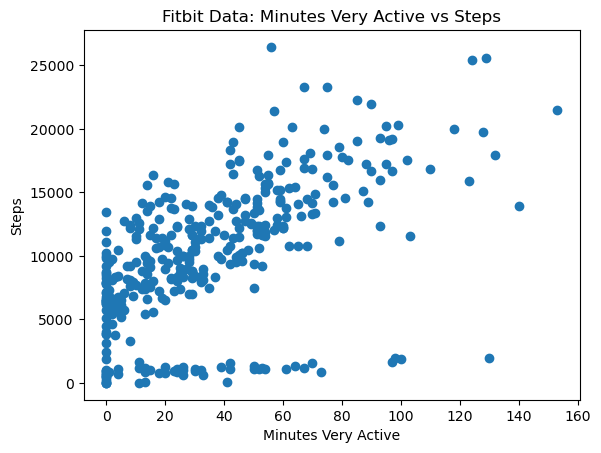

In [44]:
# your answer here
import matplotlib.pyplot as plt 

plt.scatter(x=fitbit["Minutes Very Active"], y=fitbit["Steps"])
plt.xlabel("Minutes Very Active")
plt.ylabel("Steps")
plt.title("Minutes Very Active vs Steps")
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# your answer here

#as the number of minutes increases, the steps count also tends to increase.
#However, the relationship may not be perfectly linear.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [45]:
# your answer here
correlation_sed = fitbit["Minutes Sedentary"].corr(fitbit["Steps"])

print(correlation_sed)

0.07690608062990098


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

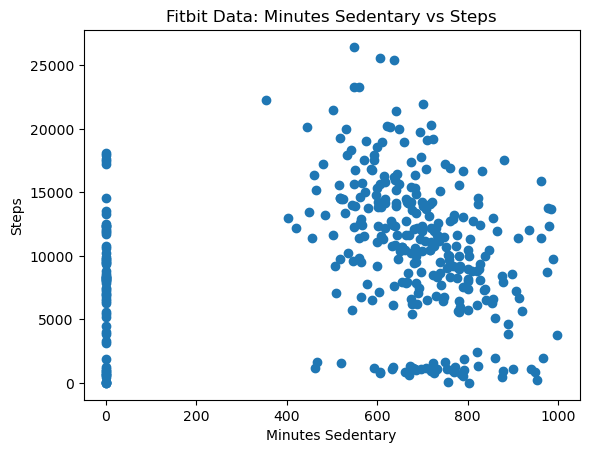

In [46]:
# your answer here
plt.scatter(x=fitbit["Minutes Sedentary"], y=fitbit["Steps"])
plt.xlabel("Minutes Sedentary")
plt.ylabel("Steps")
plt.title("Minutes Sedentary vs Steps")
plt.show()

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [48]:
# your answer here
correlation_sed = fitbit["MinutesOfSleep"].corr(fitbit["Steps"])

print(correlation_sed)

0.1309856595083637


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

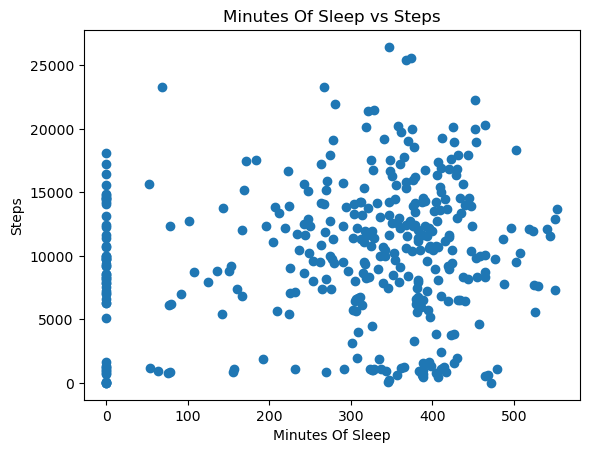

In [50]:
# your answer here
plt.scatter(x=fitbit["MinutesOfSleep"], y=fitbit["Steps"])
plt.xlabel("Minutes Of Sleep")
plt.ylabel("Steps")
plt.title("Minutes Of Sleep vs Steps")
plt.show()

In [ ]:
#we can see that there is a wide range of Steps counts for each level of MinutesOfSleep
#there is a lot of variability in the data and this indicates that there may be other factors that influence correlation between them

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [52]:
# your answer here
column = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']
subset_fitbit = fitbit[column]
cor_fit = subset_fitbit.corr()

cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [53]:
# your answer here
steps = cor_fit['Steps'].sort_values(ascending=False)
print(steps)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [61]:
# your answer here
time_grades=pd.read_csv("Time_Grades.csv")
time_grades



,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

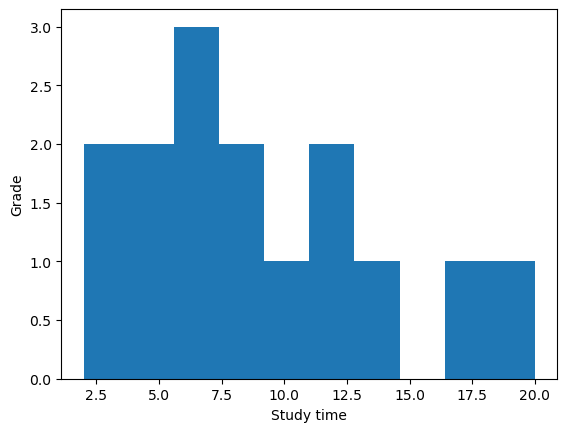

In [59]:
# your answer here

plt.hist(time_grades['Study time'], bins=10)


plt.xlabel('Study time')
plt.ylabel('Grade')


plt.show()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [65]:
# your answer here
from scipy.stats import spearmanr


pearson = time_grades['Study time'].corr(time_grades['Grade'])
spearman= spearmanr(time_grades['Study time'], time_grades['Grade'])

print(pearson)
print(spearman)

0.7980456073578858
SpearmanrResult(correlation=0.819658753036942, pvalue=0.00018377469445788485)


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

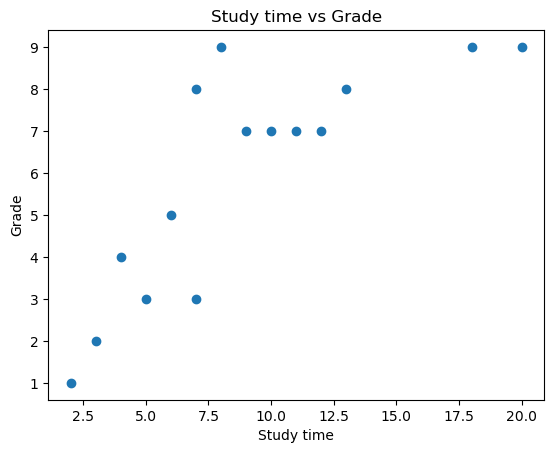

In [66]:
# your answer here
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'])
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.title('Study time vs Grade')
plt.show()


#students who spend more time studying tend to have higher grades

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# your answer here
#Pearson correlation is used to measure the linear relationship between two continuous variables, 
#while Spearman correlation is used to measure the degree of association between two variables irrespective of whether they are continuous or ordinal